<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [21]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [22]:
#will want to see genres to know how to subset for action later as requested by the project
netflix_df['genre'].head()

0              Dramas
1       Horror Movies
2              Action
3              Dramas
4    International TV
Name: genre, dtype: object

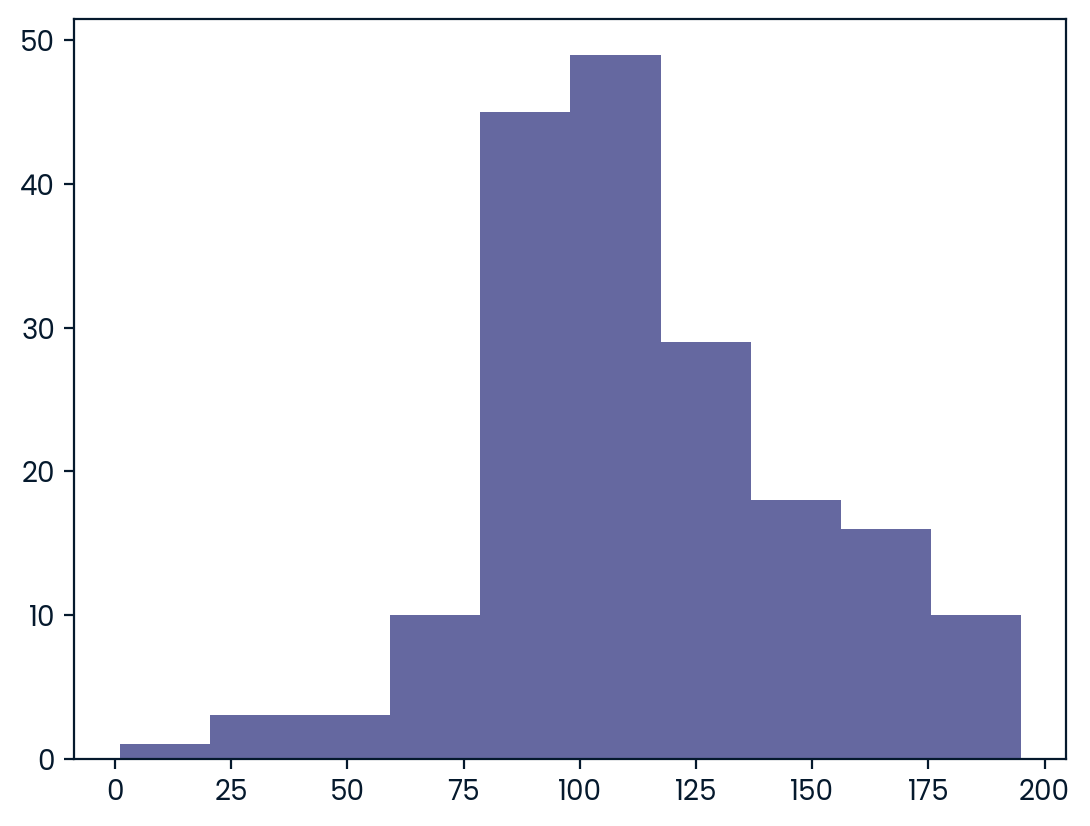

In [23]:
#1 Filter for 1900s
netflix_df_19s = netflix_df[netflix_df["release_year"].between(1990, 1999)]
#we want to find the most frequent movie duration will do this with a histogram
plt.hist(netflix_df_19s['duration'])
plt.show()

In [24]:
#we have obtained our most frequent duration but lets do it a bit nicer with plotly
import plotly.express as px
fig = px.histogram(netflix_df_19s, x='duration', 
                   nbins=20,  # Adjust number of bins as needed
                   title='Histogram of Movie Durations',
                   labels={'duration': 'Duration (minutes)', 'count': 'Frequency'})

# Customize layout (optional)
fig.update_layout(
    xaxis_title="Duration (minutes)",
    yaxis_title="Number of Movies",
    bargap=0.1  # Small gap between bars
)

# Show the plot
fig.show()
#this graph is more interactive and hovering reveals 30 movies between 100 to 109 mins


In [25]:
#another less visual way
duration = netflix_df_19s['duration'].mode()[0]
print(duration)
#here we will get a discrete value but now we have tackled the problem in 3 different ways

94


In [28]:
#finally we want to count the number of short action movies
#from earlier steps we obtain the exact name of the action genre
#short action will refer to action movies that are less than 90 mins
short_action_df = netflix_df_19s[(netflix_df_19s['genre'] == 'Action') & (netflix_df_19s['duration'] < 90)]

#here ive used the and operator to do both steps at once
print(len(short_action_df))

#so in the 1900s there were 7 short action movies
short_movie_count = len(short_action)

short_action_df
#to us visualizing what movies they were might be more useful than just the number

7


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1288,s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1998,69,"Fifteen years after the Second Impact, apathet...",Action
1698,s2708,Movie,Hero,Corey Yuen,"Takeshi Kaneshiro, Yuen Biao, Valerie Chow, Je...",Hong Kong,"August 1, 2018",1997,89,A pugilist from Shantung struggles to rise to ...,Action
2328,s3718,Movie,"Look Out, Officer",Sze Yu Lau,"Stephen Chow, Bill Tung, Stanley Sui-Fan Fung,...",Hong Kong,"August 16, 2018",1990,88,An officer killed on the job returns to Earth ...,Action
2993,s4787,Movie,Passenger 57,Kevin Hooks,"Wesley Snipes, Bruce Payne, Tom Sizemore, Alex...",United States,"January 1, 2021",1992,84,Air marshal John Cutter must stop notorious te...,Action
3297,s5299,Movie,Rumble in the Bronx,Stanley Tong,"Jackie Chan, Anita Mui, Françoise Yip, Bill Tu...",Hong Kong,"November 1, 2019",1995,89,During a visit to the Bronx to help out at his...,Action
3806,s6114,Movie,The Bare-Footed Kid,Johnnie To,"Aaron Kwok, Lung Ti, Maggie Cheung, Chien-lien...",Hong Kong,"August 16, 2018",1993,83,"While working at a family friend's business, a...",Action
3943,s6330,Movie,The End of Evangelion,"Hideaki Anno, Kazuya Tsurumaki","Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1997,87,"Seele orders an all-out attack on NERV, aiming...",Action
